# Triangulate a 2d grid

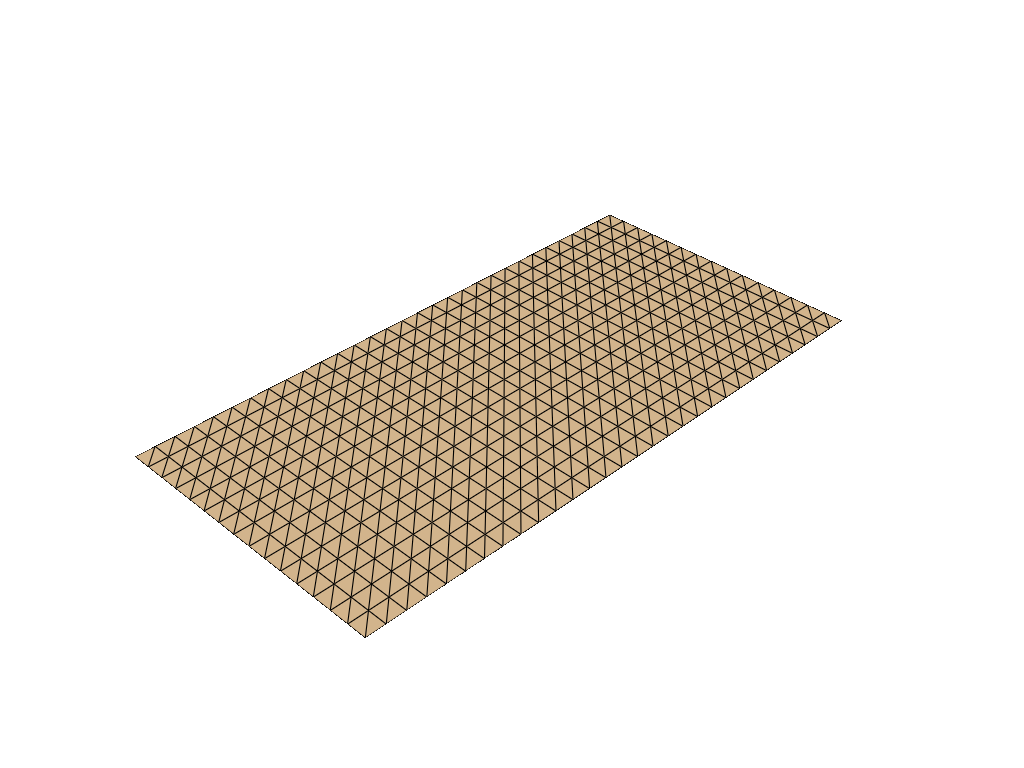

In [2]:
from polymesh.grid import gridQ4 as grid
from polymesh import PolyData, PointData, CartesianFrame
from polymesh.cells import T3 as CellData
from polymesh.utils.topology import Q4_to_T3
import numpy as np

# create a grid of 30 x 15 cells, with 2 x 2 nodes per cell
gridparams = {
    "size": (1200, 600),
    "shape": (30, 15),
}
coords, topo = grid(**gridparams)

# the `grid` function creates a 2d mesh in the x-y plane,
# but we want a 3d mesh, with zero values for the z axis.
coords = np.pad(coords, ((0, 0), (0, 1)), mode='constant')

coords, topo = Q4_to_T3(coords, topo)

frame = CartesianFrame(dim=3)

pd = PointData(coords=coords, frame=frame)
cd = CellData(topo=topo, frames=frame)

mesh = PolyData(pd, cd)

mesh.plot(notebook=True, jupyter_backend="static", theme="document")